# Lab 03 - Regression

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

## 1. Introduction to Regression

Regression is a **supervised learning task** where the goal is to **predict a continuous value** based on input features. It's used in a wide range of domains like real estate, finance, and energy systems.

### 🔍 Key Concepts:
- **Target Variable**: What we want to predict (e.g., house price).
- **Features**: Inputs used for prediction (e.g., size, income, location).
- **Regression Function**: The mathematical relationship between features and target.

### 🧠 Common Applications:
- Predicting house prices
- Estimating energy consumption
- Forecasting revenue
- Predicting equipment failure (Remaining Useful Life)

---

### 🔄 Regression vs. Classification

| Aspect          | Regression                           | Classification                     |
|-----------------|--------------------------------------|-------------------------------------|
| Output          | Continuous (e.g., price)             | Categorical (e.g., spam/not spam)  |
| Goal            | Minimize prediction error            | Maximize correct classification     |
| Examples        | Predict temperature, sales           | Email filtering, image labeling     |
| Metrics         | MSE, MAE, R²                         | Accuracy, Precision, F1-score       |

<p align="center">
    <img src="docs/Regression_vs_Classification.avif" alt="Regression vs Classification" width="50%">
</p>


## 2. Loading and Inspecting the Dataset

In this lab, we will use the [**California Housing Dataset**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html), a classic regression dataset.

### 🎯 Target Variable:
- `MedHouseValue`: Median house value in a district, expressed in $100,000.

### 📊 Features:
- `MedInc`: Median income in block group.
- `HouseAge`: Median house age in block group.
- `AveRooms`: Average number of rooms per household.
- `AveBedrms`: Average number of bedrooms per household.
- `Population`: Block group population.
- `AveOccup`: Average number of household members.
- `Latitude`: Block group latitude.
- `Longitude`: Block group longitude.

We'll begin by **loading** the dataset, **exploring** its structure, and **visualizing** the distribution of the target variable.

In [12]:
# For this lab, we'll use the California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Create a dataframe for easier manipulation
df = X.copy()
df['MedHouseValue'] = y

# Dataset description
# print(housing.DESCR)

In [13]:
print("\nDataset Info:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

print("\nFirst 5 rows of the dataset:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Dataset Description:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min       

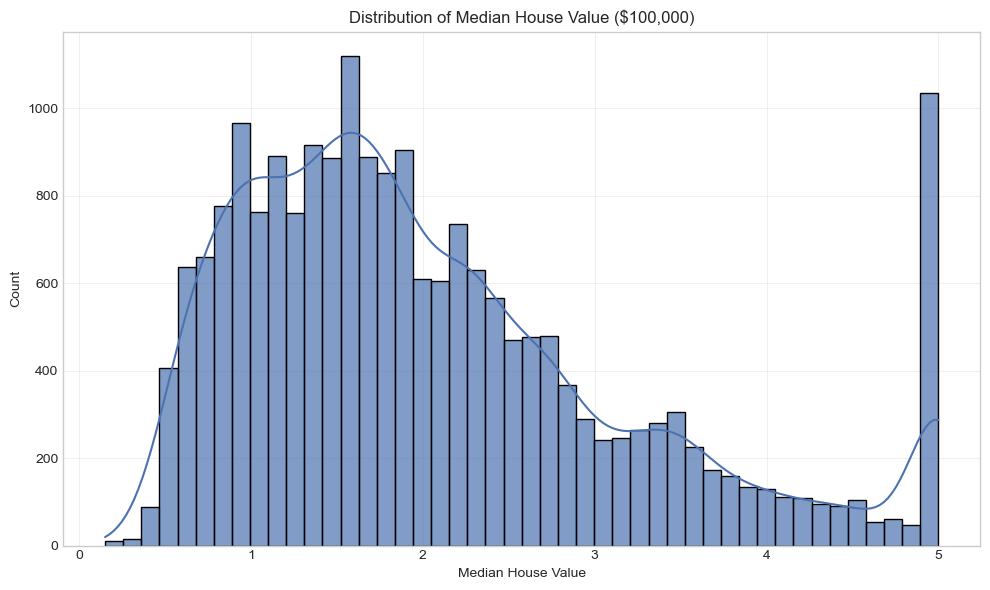

In [14]:
# Visualize the distribution of the target variable (Median House Value)
# The target variable represents the median house value for California districts, expressed in $100,000.

plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseValue'], kde=True, alpha=0.7)
plt.title('Distribution of Median House Value ($100,000)')
plt.xlabel('Median House Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Train/Validation/Test Split

To evaluate our model fairly, we split the data into:

- **Training set**: for fitting the model
- **Validation set**: for tuning hyperparameters
- **Test set**: for final performance assessment


In [15]:
# 80% train + validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 75% train, 25% val of the 80% → 60/20/20 split
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print(f"Train samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

Train samples: 12384
Validation samples: 4128
Test samples: 4128


## 4. Feature Scaling

Feature scaling is a **preprocessing step** that adjusts the range or distribution of features. It ensures that no single feature dominates others due to its scale — especially important when features have different units (like income in dollars vs. number of rooms).


### 🚀 Why Scale Features?

1. **Balances Feature Influence**  
   Without scaling, features with larger values can overshadow others in model training.

2. **Improves Model Accuracy**  
   Algorithms like KNN or SVR depend on distances — scaling ensures those distances are meaningful.

3. **Faster Learning**  
   Scaled features help gradient-based algorithms (like linear regression or neural nets) converge faster.

4. **Fair Regularization**  
   Penalization methods like Lasso and Ridge assume features are on a similar scale.


### 📐 Two Common Scaling Methods

#### 1. `StandardScaler`  
Transforms features to **zero mean** and **unit variance**:  
$$
z = \frac{x - \mu}{\sigma}
$$  
✅ Great for algorithms that assume Gaussian-like data:
- Support Vector Machines (SVM)  
- Logistic Regression  
- Principal Component Analysis (PCA)

#### 2. `MinMaxScaler`  
Rescales data to a **fixed range**, usually [0, 1]:  
$$
x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
$$  
✅ Works well for distance-based models:
- K-Nearest Neighbors (KNN)  
- Neural Networks

### 📊 Why Scaling Helps Specific Models

#### Support Vector Regressor (SVR)
- Uses kernel functions to compute distances in high-dimensional space.  
- Large-scale features can skew the decision boundary.  
- ✅ **Scaling ensures equal weight across features.**

#### K-Nearest Neighbors (KNN)
- Relies on **Euclidean distance**.  
- Features with large values dominate the distance calculation.  
- ✅ **Scaling guarantees fair neighbor selection.**


### ✅ Summary

| Do Scale With   | When to Use                        |
|------------------|-------------------------------------|
| `StandardScaler` | SVM, Logistic Regression, PCA       |
| `MinMaxScaler`   | KNN, Neural Networks                |

🚫 **No scaling needed** for tree-based models like Decision Trees or Random Forests.


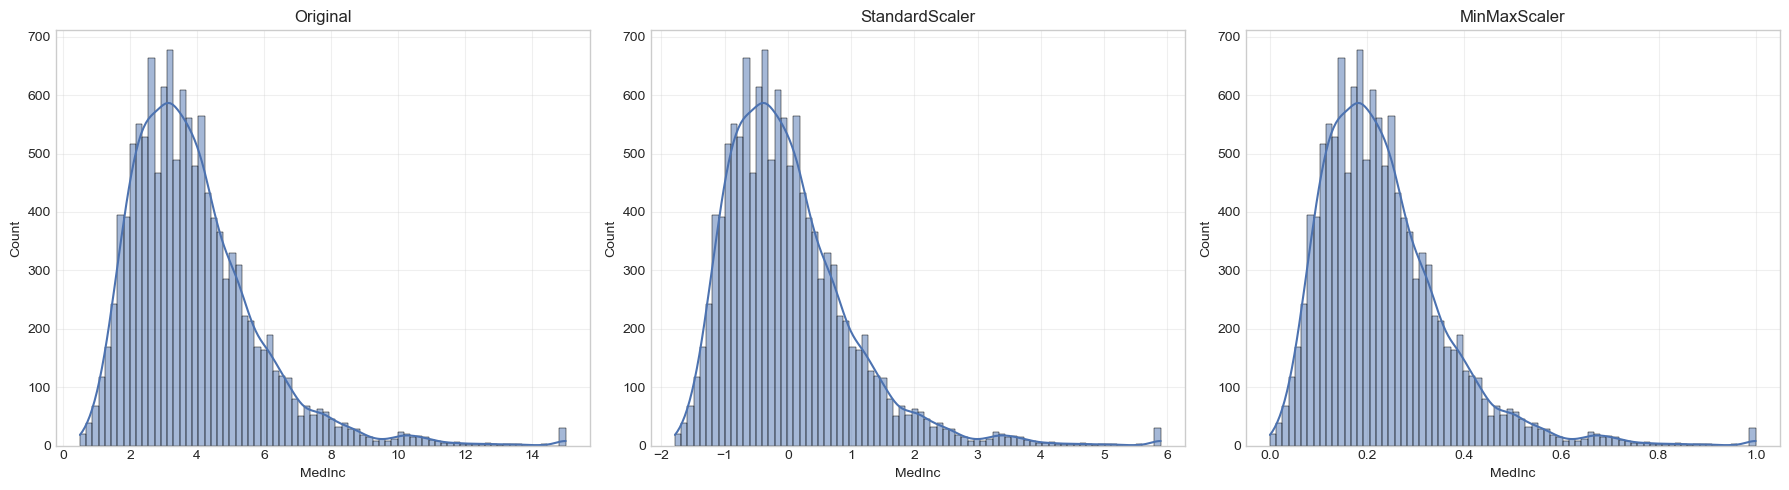

In [17]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Fit on training, transform all sets
X_train_scaled = standard_scaler.fit_transform(X_train)
X_val_scaled = standard_scaler.transform(X_val)
X_test_scaled = standard_scaler.transform(X_test)

X_train_minmax = minmax_scaler.fit_transform(X_train)
X_val_minmax = minmax_scaler.transform(X_val)
X_test_minmax = minmax_scaler.transform(X_test)


# Visualization
import numpy as np

feature = 'MedInc'
feature_idx = X.columns.get_loc(feature)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(X_train[feature], kde=True, ax=ax1)
ax1.set_title('Original')

sns.histplot(X_train_scaled[:, feature_idx], kde=True, ax=ax2)
ax2.set_title('StandardScaler')

sns.histplot(X_train_minmax[:, feature_idx], kde=True, ax=ax3)
ax3.set_title('MinMaxScaler')

for ax in (ax1, ax2, ax3):
    ax.grid(True, alpha=0.3)
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

## 5. Model Training and Comparison

- Linear Regression
- Polynomial Regression
- Ridge and Lasso Regression (regularization focus)
- Decision Tree and Random Forest Regressor
- Support Vector Regressor

### 5.1 Linear Regression

### 5.2 Polynomial Regression

### 5.3 Ridge Regression (L2 Regularization)

### 5.4 Lasso Regression (L1 Regularization)

### 5.5 Decision Tree Regressor

### 5.6 Random Forest Regressor

### 5.7 Support Vector Regressor

## 6. Loss Functions and Error Analysis

- Introduce common regression loss functions: MAE, MSE, RMSE
- Show how individual prediction errors contribute to loss
- Visualize predictions vs. true values
- Plot residuals and explain their meaning

## 7. Model Evaluation and Diagnostics

- Use mean_squared_error, mean_absolute_error, r2_score
- Create residual plots and error distributions